In [1]:
import cv2
import matplotlib.pyplot as plt
z=r"C:\Users\Pratyush\Music\PlantVillage\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\0b29fe6c-b8da-4a5e-b94a-79b0b42fd905___UF.GRC_YLCV_Lab 01813.JPG"
##plt.show()

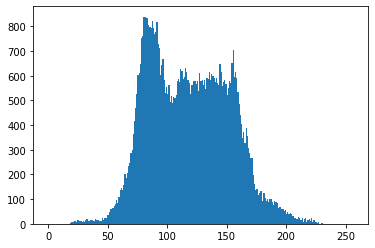

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(z,0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

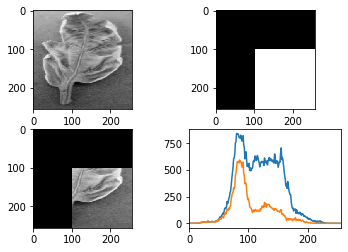

In [3]:
img = cv2.imread(z,0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

In [4]:
import numpy as np
from skimage import io

img2 = io.imread(z)[:, :, :-1]
print(img2.shape)
img=cv2.resize(img2,(252,254))
img.shape

(256, 256, 2)


(254, 252, 2)

In [5]:
average = img.mean(axis=0).mean(axis=0)

In [6]:
pixels = np.float32(img.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

In [7]:
dominant = palette[np.argmax(counts)]

In [8]:
average

array([113.00776465, 130.06475753])

In [9]:
dominant

array([82.495674, 84.25802 , 82.51853 ], dtype=float32)

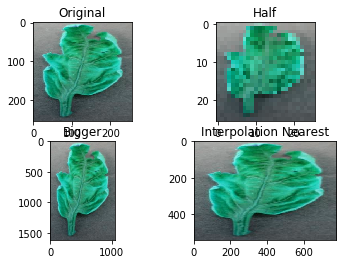

In [10]:
import numpy as np  
image = cv2.imread(z, 1) 
# Loading the image 
  
half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1) 
bigger = cv2.resize(image, (1050, 1610)) 
  
stretch_near = cv2.resize(image, (780, 540),  
               interpolation = cv2.INTER_NEAREST) 
  
  
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"] 
images =[image, half, bigger, stretch_near] 
count = 4
  
for i in range(count): 
    plt.subplot(2, 2, i + 1) 
    plt.title(Titles[i]) 
    plt.imshow(images[i]) 
  
plt.show() 

In [11]:
import matplotlib.image as img 
  
# Read batman image and print dimensions 
batman_image = img.imread(z) 
print(batman_image.shape) 

(256, 256, 3)


In [12]:
from matplotlib import image 
imgimage = img.imread(z)
imgimage.shape

(256, 256, 3)

In [13]:
r = []
g = []
b = []
for line in imgimage:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

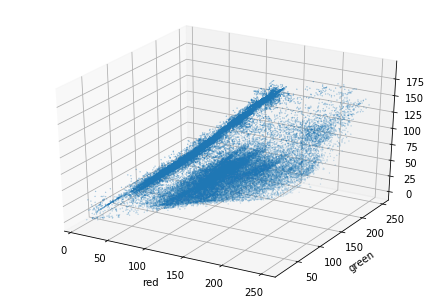

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b,s=0.05)
plt.xlabel('red')
plt.ylabel('green')
plt.show()

#plt.zlabel('blue')


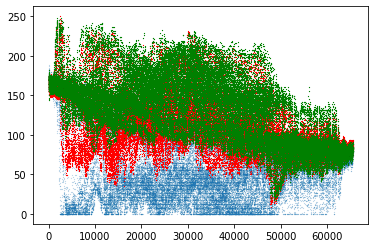

In [15]:
plt.scatter(np.arange(0,65536),b,s=0.011)
plt.scatter(np.arange(0,65536),r,s=0.11,marker='*',c="red")
plt.scatter(np.arange(0,65536),g,s=0.11,marker='^',c="green")

In [16]:
import pandas as pd
df = pd.DataFrame({'red': r,
'blue': b,
'green': g})

In [17]:
from scipy.cluster.vq import whiten
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
20869,132,81,168,3.868580,1.821469,4.162390
37303,120,20,161,3.516891,0.449746,3.988957
32471,176,60,192,5.158106,1.349237,4.757017
10507,156,155,158,4.571958,3.485528,3.914628
3958,58,0,124,1.699830,0.000000,3.072240
54197,90,80,87,2.637668,1.798982,2.155523
44061,109,66,110,3.194509,1.484160,2.725374
57788,94,86,91,2.754898,1.933906,2.254628
31303,123,8,167,3.604813,0.179898,4.137614
26034,112,12,165,3.282431,0.269847,4.088061


In [18]:
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 2)

In [19]:
print(cluster_centers)

[[2.52954928 2.42480688 1.29423746]
 [4.1237285  4.04883315 1.81694327]]


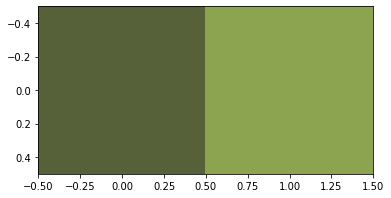

In [20]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
    scaled_r * r_std / 255,
    scaled_g * g_std / 255,
    scaled_b * b_std / 255
    ))
plt.imshow([colors])
plt.show()

In [21]:
import cv2
import numpy as np

img = cv2.imread(z)
height, width, _ = np.shape(img)

# calculate the average color of each row of our image
avg_color_per_row = np.average(img, axis=0)

# calculate the averages of our rows
avg_colors = np.average(avg_color_per_row, axis=0)

# avg_color is a tuple in BGR order of the average colors
# but as float values
print(f'avg_colors: {avg_colors}')

# so, convert that array to integers
int_averages = np.array(avg_colors, dtype=np.uint8)
print(f'int_averages: {int_averages}')

# create a new image of the same height/width as the original
average_image = np.zeros((height, width, 3), np.uint8)
# and fill its pixels with our average color
average_image[:] = int_averages

# finally, show it side-by-side with the original
cv2.imshow("Avg Color", np.hstack([img, average_image]))
cv2.waitKey(100)
cv2.destroyAllWindows()

avg_colors: [ 68.9977417  130.18855286 113.13136292]
int_averages: [ 68 130 113]


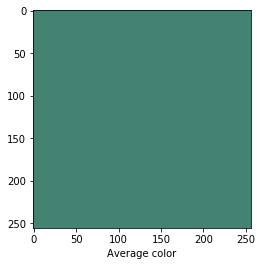

In [22]:
plt.imshow(average_image)
plt.xlabel("Average color")
plt.show()